In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


# **Data Understanding**

### Dataset Description:
- **PatientID**: A unique identifier for each patient. It helps differentiate between individuals in the dataset.
- **Pregnancies**: Number of times the patient has been pregnant. It may influence the risk of diabetes in women.
- **PlasmaGlucose**: Plasma glucose concentration after a glucose tolerance test (mg/dL). Higher levels can indicate diabetes.
- **DiastolicBloodPressure**: Diastolic blood pressure (mm Hg). Measures the pressure in blood vessels between heartbeats.
- **TricepsThickness**: Skinfold thickness of the triceps (mm), often used to estimate body fat.
- **SerumInsulin**: Serum insulin level (μU/mL). High levels may indicate insulin resistance or diabetes.
- **BMI**: Body Mass Index (kg/m²), calculated as weight divided by the square of height. It is a measure of body fat.
- **DiabetesPedigree**: A score indicating the likelihood of diabetes based on family history. Higher values suggest a stronger genetic predisposition.
- **Age**: Age of the patient (years).
- **Diabetic**: Target variable (0 = Non-diabetic, 1 = Diabetic). Indicates whether the patient is diagnosed with diabetes.


In [34]:
import pandas as pd

# Load the dataset
# file_path = '/content/drive/MyDrive/TAIPEI_diabetes.csv'
file_path = 'data/TAIPEI_diabetes.csv'

data = pd.read_csv(file_path)

# Display the first few rows
data.head()


,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.51,1.21,21,0
1,1147438,8,92,93,47,36,21.24,0.16,23,0
2,1640031,7,115,47,52,35,41.51,0.08,23,0
3,1883350,9,103,78,25,304,29.58,1.28,43,1
4,1424119,1,85,59,27,35,42.60,0.55,22,0


In [2]:
# Determine how many instances of each class (0 and 1) are in the 'Diabetic' column
class_counts = data['Diabetic'].value_counts()

# Print the class distribution
print("\nClass distribution in the 'Diabetic' column:")
print(class_counts)


Class distribution in the 'Diabetic' column:
Diabetic
0    10000
1     5000
Name: count, dtype: int64


=> in our population, 1 out of 2 is diabetic

# **Data Cleaning**

1. **Load and Inspect the Data**

In [3]:
# Check for basic info
data.info()

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Check statistical summary
print("\nStatistical Summary:\n", data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB

Missing Values:
 PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                

2. **Handle Missing Values**

In [53]:
# Fill missing values with mean for numerical columns
data.fillna(data.mean(), inplace=True)

# Drop rows with too many missing values (optional)
# data.dropna(thresh=some_threshold, inplace=True)


3. **Detect Outliers**

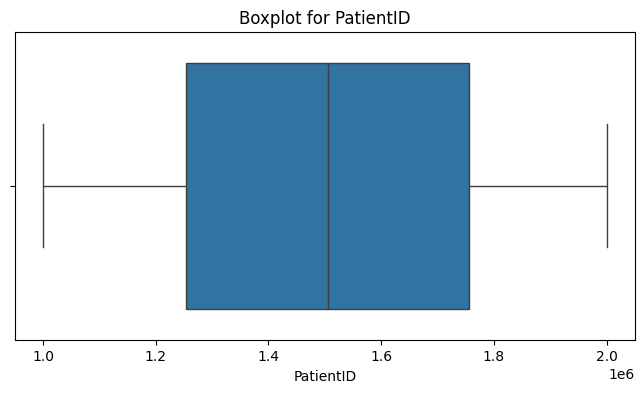

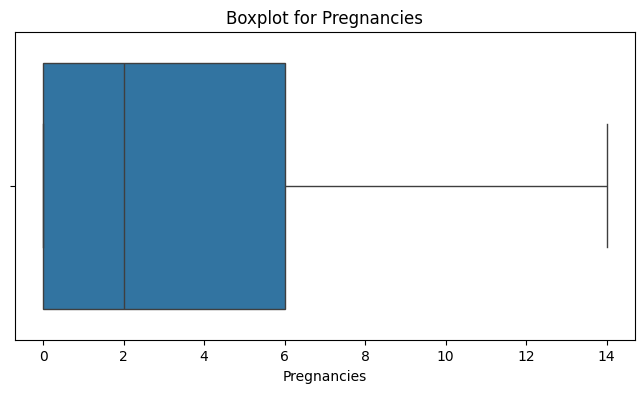

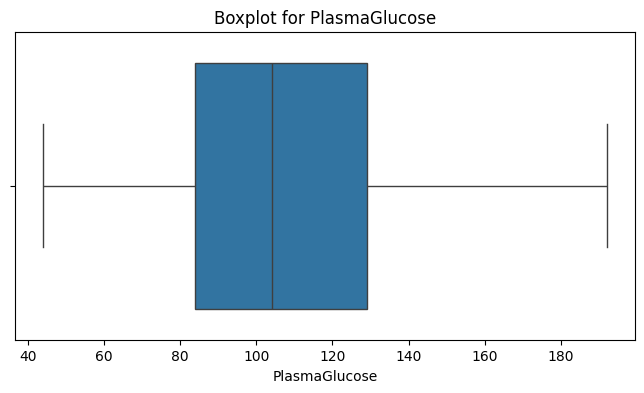

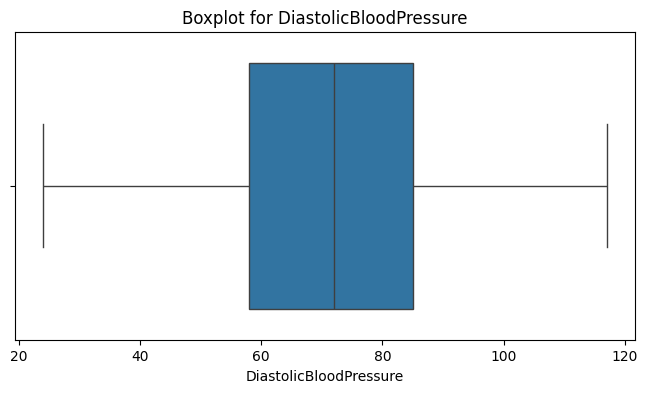

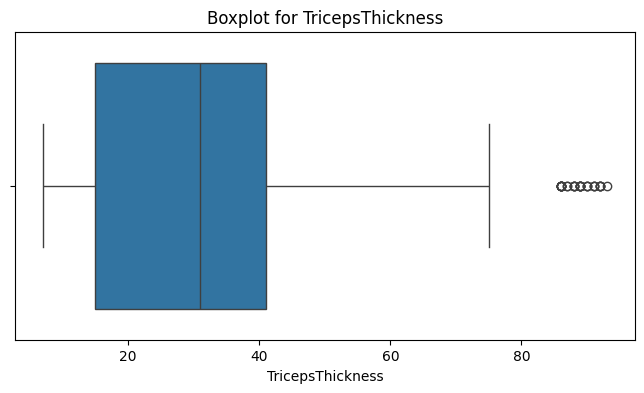

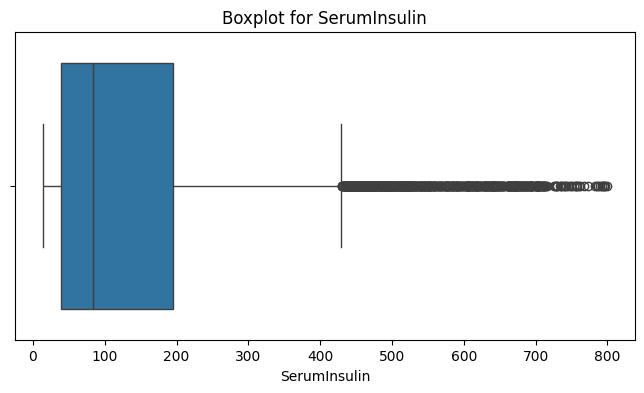

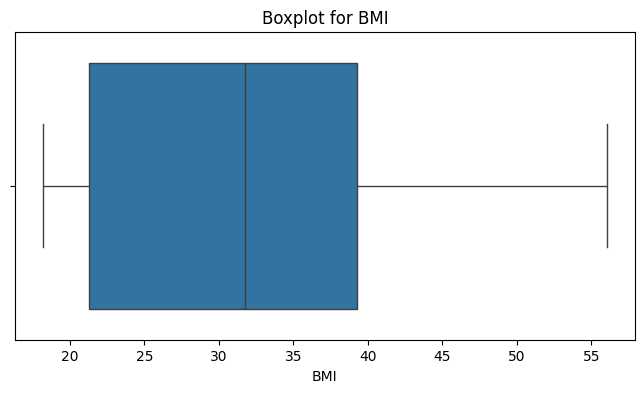

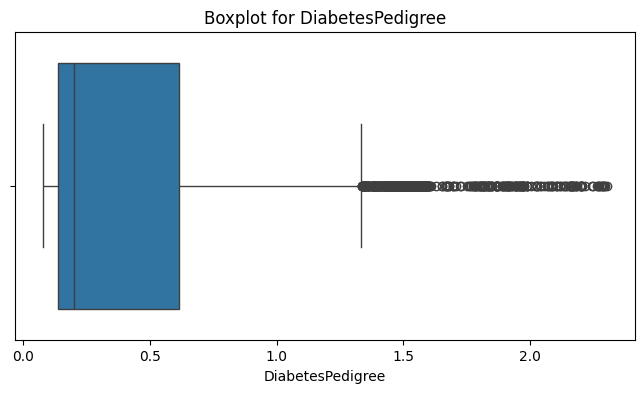

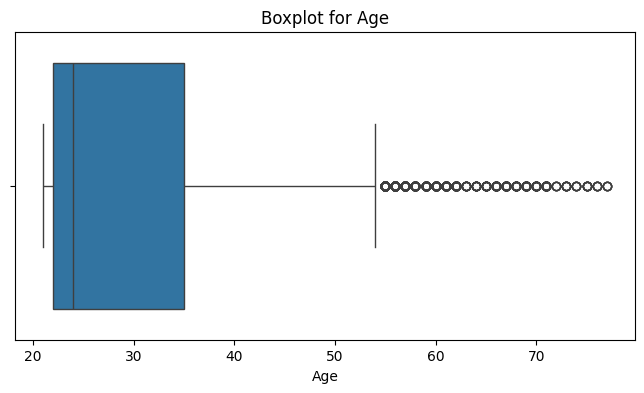

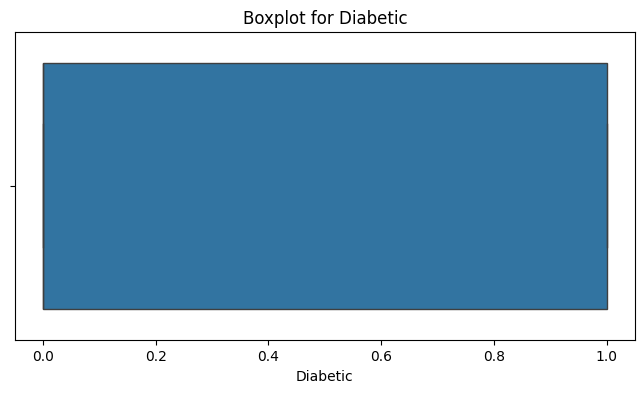

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for numerical columns
numeric_cols = data.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


In [9]:
data.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [11]:
# Set the display format for floating-point numbers
pd.options.display.float_format = '{:.2f}'.format

# Select the row with the maximum value in the 'Pregnancies' column
data.loc[data['Pregnancies'].idxmax()]

PatientID                1503348.00
Pregnancies                   14.00
PlasmaGlucose                119.00
DiastolicBloodPressure        62.00
TricepsThickness              38.00
SerumInsulin                 682.00
BMI                           35.12
DiabetesPedigree               0.17
Age                           23.00
Diabetic                       1.00
Name: 984, dtype: float64

In [39]:
data_young_pregnancies =  data.loc[(data['Pregnancies']>10) & (data['Age']<25)]
data_young_pregnancies


,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
247,1625818,11,138,63,35,216,30.13,0.83,23,0
523,1120994,11,143,81,13,147,33.20,0.20,22,1
767,1338789,11,124,82,46,83,36.00,0.11,22,0
984,1503348,14,119,62,38,682,35.12,0.17,23,1
1118,1775347,11,102,82,22,636,31.04,0.17,21,1
...,...,...,...,...,...,...,...,...,...,...
14549,1410663,13,99,79,42,492,28.99,0.12,22,1
14592,1628033,11,137,79,35,34,43.45,0.18,23,0
14710,1076483,12,129,50,57,166,36.63,0.80,22,1
14928,1831093,12,176,95,48,396,30.36,0.16,21,1


In [40]:
data_young_pregnancies['Diabetic'].value_counts()

Diabetic
1    99
0    27
Name: count, dtype: int64

In [ ]:
data.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.51,1.21,21,0
1,1147438,8,92,93,47,36,21.24,0.16,23,0
2,1640031,7,115,47,52,35,41.51,0.08,23,0
3,1883350,9,103,78,25,304,29.58,1.28,43,1
4,1424119,1,85,59,27,35,42.60,0.55,22,0


In [55]:
from scipy.stats import zscore

# Calculate z-scores for numerical columns
z_scores = data[numeric_cols].apply(zscore)

# Identify rows where z-score > 3 or < -3
outliers = (z_scores.abs() > 3).any(axis=1)

# Show rows with outliers
print("\nOutliers:\n", data[outliers])



Outliers:
        PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
30       1121857           11             75                      89   
33       1140806            3            123                      61   
48       1662484            6             73                      61   
67       1687914            4            104                      68   
87       1929520            2            104                      62   
...          ...          ...            ...                     ...   
14897    1694466            3            110                      74   
14900    1833840            0            109                      80   
14934    1345247            0             92                      44   
14938    1938060            1            114                      81   
14943    1867287            1            119                      42   

       TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  \
30                    8           541  29.422754

4. **Address Outliers**


**Capping outliers refers to limiting or "clipping" the values of outliers to a certain range, usually defined by the percentile values of the data. here instead of removing outliers completely, we cap them to a threshold value**

In [56]:
# Option 1: Remove outliers
data_cleaned = data[~outliers]

# Option 2: Cap outliers at 99th percentile
for col in numeric_cols:
    upper_limit = data[col].quantile(0.99)
    lower_limit = data[col].quantile(0.01)
    data[col] = data[col].clip(lower=lower_limit, upper=upper_limit)


5. **Verify Data Cleaning**

In [57]:
# Check for missing values again
print("\nAfter Cleaning - Missing Values:\n", data.isnull().sum())

# Check for duplicates again
print(f"\nAfter Cleaning - Duplicate rows: {data.duplicated().sum()}")

# Check statistical summary again
print("\nAfter Cleaning - Statistical Summary:\n", data.describe())



After Cleaning - Missing Values:
 PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

After Cleaning - Duplicate rows: 0

After Cleaning - Statistical Summary:
           PatientID   Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
count  1.500000e+04  15000.000000   15000.000000            15000.000000   
mean   1.502922e+06      3.216067     107.830800               71.260200   
std    2.890987e+05      3.367195      31.832516               16.436073   
min    1.010237e+06      0.000000      48.000000               39.000000   
25%    1.252866e+06      0.000000      84.000000               58.000000   
50%    1.505508e+06      2.000000     104.000000               72.000000   
75%    1.755205e+06      6.000000     129.000000               8

# **Feature Extraction**

In [58]:
data.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778.0,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438.0,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031.0,7,115,47,52,35,41.511523,0.080593,23,0
3,1883350.0,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119.0,1,85,59,27,35,42.604536,0.549542,22,0


In [13]:
df = data.copy()

### **Preforming SMOTE to balance both classes for our classying model**

In [14]:
# Check the class distribution
class_counts = df['Diabetic'].value_counts()
print(f"Original class distribution:\n{class_counts}\n")

Original class distribution:
Diabetic
0    10000
1     5000
Name: count, dtype: int64



In [17]:
# %pip install imbalanced-learn

import pandas as pd
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['Diabetic'])
y = df['Diabetic']  # target

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled features and target back into a balanced DataFrame
df = pd.DataFrame(X_resampled, columns=X.columns)
df['Diabetic'] = y_resampled

balanced_class_counts = pd.Series(y_resampled).value_counts()
print(f"Balanced class distribution after SMOTE:\n{balanced_class_counts}")

print("\nFirst few rows of the balanced dataset:")
print(df.head())


Balanced class distribution after SMOTE:
Diabetic
0    10000
1    10000
Name: count, dtype: int64

First few rows of the balanced dataset:
   PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0    1354778            0            171                      80   
1    1147438            8             92                      93   
2    1640031            7            115                      47   
3    1883350            9            103                      78   
4    1424119            1             85                      59   

   TricepsThickness  SerumInsulin   BMI  DiabetesPedigree  Age  Diabetic  
0                34            23 43.51              1.21   21         0  
1                47            36 21.24              0.16   23         0  
2                52            35 41.51              0.08   23         0  
3                25           304 29.58              1.28   43         1  
4                27            35 42.60              0.55   22         0  


In [83]:
df

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,BMI_Age_Ratio,ISI,BP_Age_Ratio,HighRiskPregnancy,Glucose_Insulin,Pregnancies_Age_Ratio,Metabolic_Risk,Pedigree_Glucose,Fat_Index
0,1.354778e+06,0,171,80,34,23,43.509726,1.213191,21,0,2.071892,2.542588,3.809524,0.000000,3933,0.000000,98.169909,207.455722,38.754863
1,1.147438e+06,8,92,93,47,36,21.240576,0.158365,23,0,0.923503,3.019324,4.043478,7.388026,3312,0.347826,68.746859,14.569578,34.120288
2,1.640031e+06,7,115,47,52,35,41.511523,0.080593,23,0,1.804849,2.484472,2.043478,12.633942,4025,0.304348,67.837174,9.268180,46.755762
3,1.883350e+06,9,103,78,25,304,29.582192,1.282870,43,1,0.687958,0.319366,1.813953,6.191622,31312,0.209302,70.194064,132.135594,27.291096
4,1.424119e+06,1,85,59,27,35,42.604536,0.549542,22,0,1.936570,3.361345,2.681818,1.936570,2975,0.045455,62.201512,46.711059,34.802268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.232351e+06,2,151,86,54,471,32.325136,0.153423,38,1,0.850661,0.140605,2.263158,1.701323,71121,0.052632,89.775045,23.166931,43.162568
19996,1.012603e+06,3,147,80,54,147,31.426062,0.640877,38,1,0.827002,0.462770,2.105263,2.481005,21609,0.078947,86.142021,94.208908,42.713031
19997,1.988701e+06,4,121,67,16,285,32.182966,0.707189,40,1,0.804574,0.289981,1.675000,3.218297,34485,0.100000,73.394322,85.569906,24.091483
19998,1.511727e+06,2,147,88,13,80,33.292192,0.984227,23,1,1.447487,0.850340,3.826087,2.894973,11760,0.086957,89.430731,144.681440,23.146096


### **Feature extraction**

In [18]:
import pandas as pd

# 1. BMI-to-Age Ratio
df['BMI_Age_Ratio'] = df['BMI'] / df['Age']

# 2. Insulin Sensitivity Index (ISI)
df['ISI'] = 10000 / (df['PlasmaGlucose'] * df['SerumInsulin'])

# 3. Blood Pressure Normalized by Age (BP-Age Ratio)
df['BP_Age_Ratio'] = df['DiastolicBloodPressure'] / df['Age']

# 4. High-Risk Pregnancy Index
df['HighRiskPregnancy'] = (df['Pregnancies'] * df['BMI']) / df['Age']

# 5. Glucose-Insulin Product
df['Glucose_Insulin'] = df['PlasmaGlucose'] * df['SerumInsulin']

# 6. Pregnancies-to-Age Ratio
df['Pregnancies_Age_Ratio'] = df['Pregnancies'] / df['Age']

# 7. Metabolic Risk Score
df['Metabolic_Risk'] = (df['BMI'] + df['PlasmaGlucose'] + df['DiastolicBloodPressure']) / 3

# 8. Pedigree-Adjusted Glucose
df['Pedigree_Glucose'] = df['PlasmaGlucose'] * df['DiabetesPedigree']

# 9. Fat Distribution Index
df['Fat_Index'] = (df['BMI'] + df['TricepsThickness']) / 2


In [41]:
df['BP_Age_Ratio']

0       3.81
1       4.04
2       2.04
3       1.81
4       2.68
        ... 
19995   2.26
19996   2.11
19997   1.68
19998   3.83
19999   1.40
Name: BP_Age_Ratio, Length: 20000, dtype: float64

In [20]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               20000 non-null  int64  
 1   Pregnancies             20000 non-null  int64  
 2   PlasmaGlucose           20000 non-null  int64  
 3   DiastolicBloodPressure  20000 non-null  int64  
 4   TricepsThickness        20000 non-null  int64  
 5   SerumInsulin            20000 non-null  int64  
 6   BMI                     20000 non-null  float64
 7   DiabetesPedigree        20000 non-null  float64
 8   Age                     20000 non-null  int64  
 9   Diabetic                20000 non-null  int64  
 10  BMI_Age_Ratio           20000 non-null  float64
 11  ISI                     20000 non-null  float64
 12  BP_Age_Ratio            20000 non-null  float64
 13  HighRiskPregnancy       20000 non-null  float64
 14  Glucose_Insulin         20000 non-null

In [64]:
data.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778.0,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438.0,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031.0,7,115,47,52,35,41.511523,0.080593,23,0
3,1883350.0,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119.0,1,85,59,27,35,42.604536,0.549542,22,0


In [66]:
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,BMI_Age_Ratio,ISI,BP_Age_Ratio,HighRiskPregnancy,Glucose_Insulin,Pregnancies_Age_Ratio,Metabolic_Risk,Pedigree_Glucose,Fat_Index
0,1354778.0,0,171,80,34,23,43.509726,1.213191,21,0,2.071892,2.542588,3.809524,0.000000,3933,0.000000,98.169909,207.455722,38.754863
1,1147438.0,8,92,93,47,36,21.240576,0.158365,23,0,0.923503,3.019324,4.043478,7.388026,3312,0.347826,68.746859,14.569578,34.120288
2,1640031.0,7,115,47,52,35,41.511523,0.080593,23,0,1.804849,2.484472,2.043478,12.633942,4025,0.304348,67.837174,9.268180,46.755762
3,1883350.0,9,103,78,25,304,29.582192,1.282870,43,1,0.687958,0.319366,1.813953,6.191622,31312,0.209302,70.194064,132.135594,27.291096
4,1424119.0,1,85,59,27,35,42.604536,0.549542,22,0,1.936570,3.361345,2.681818,1.936570,2975,0.045455,62.201512,46.711059,34.802268


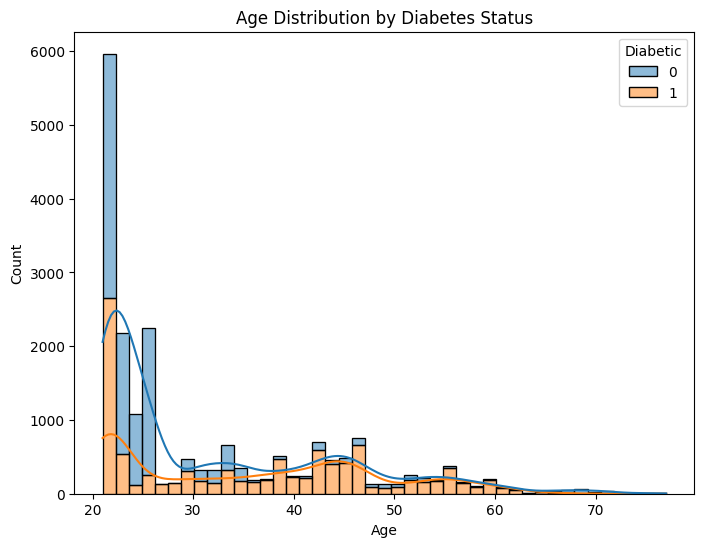

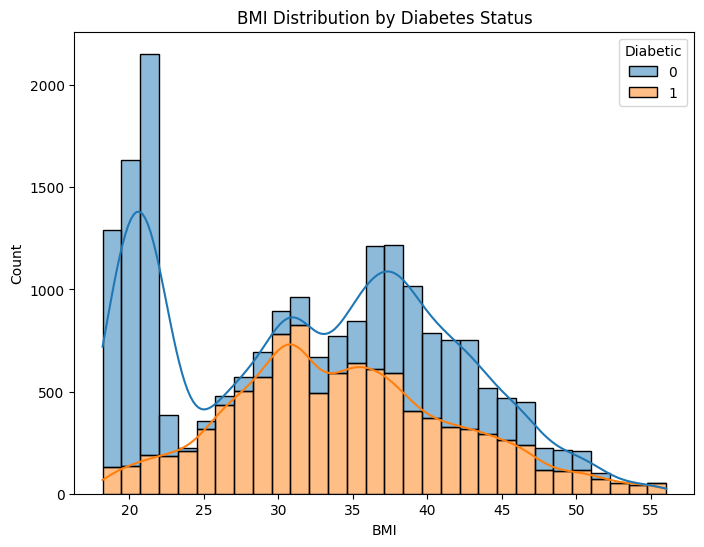

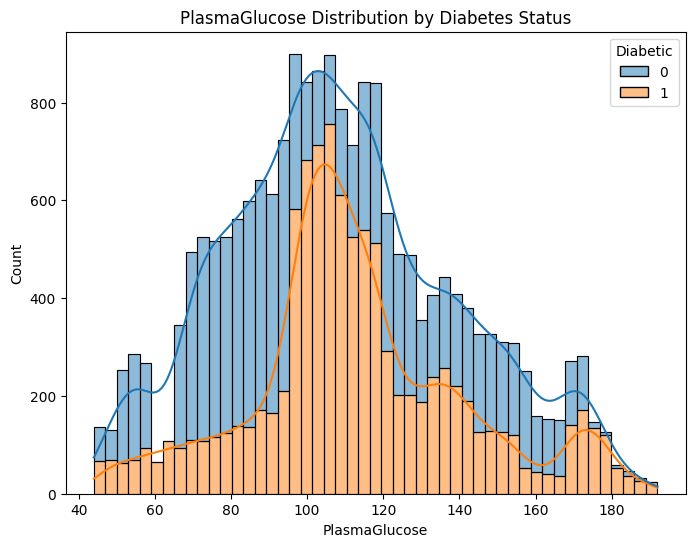

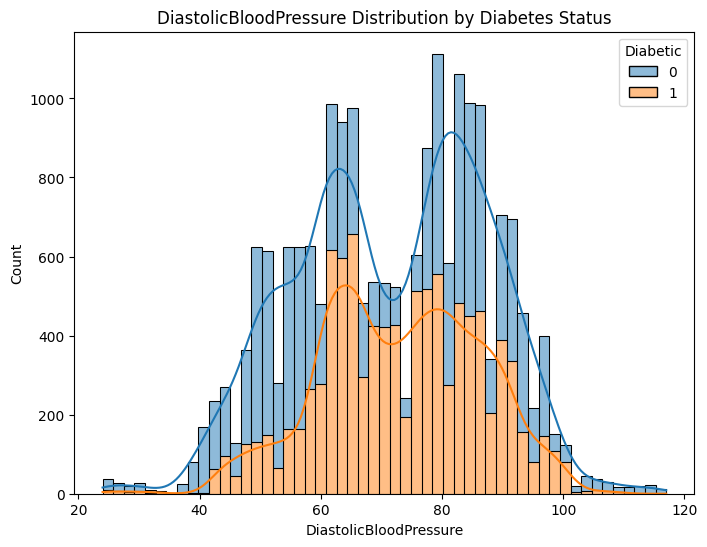

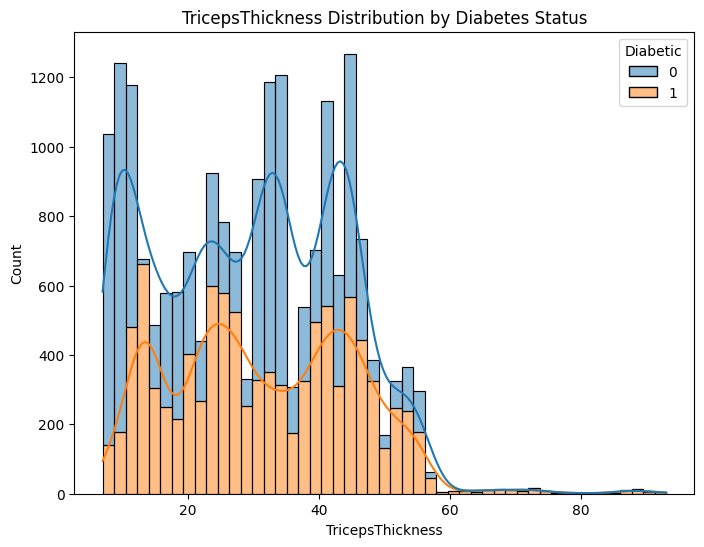

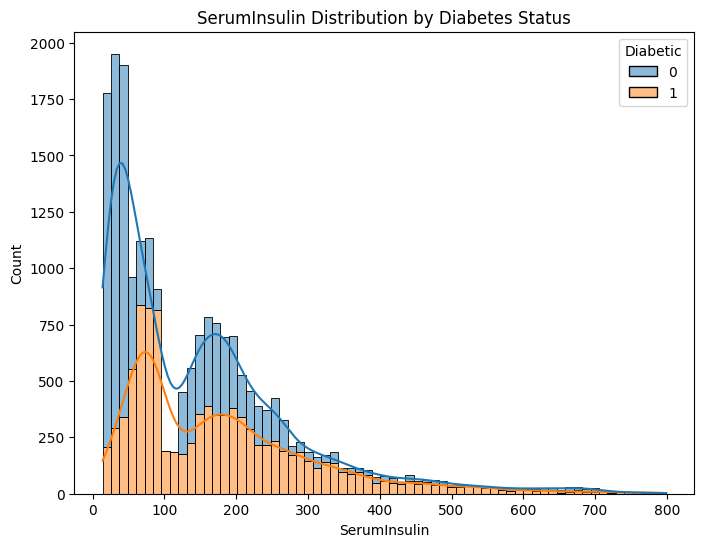

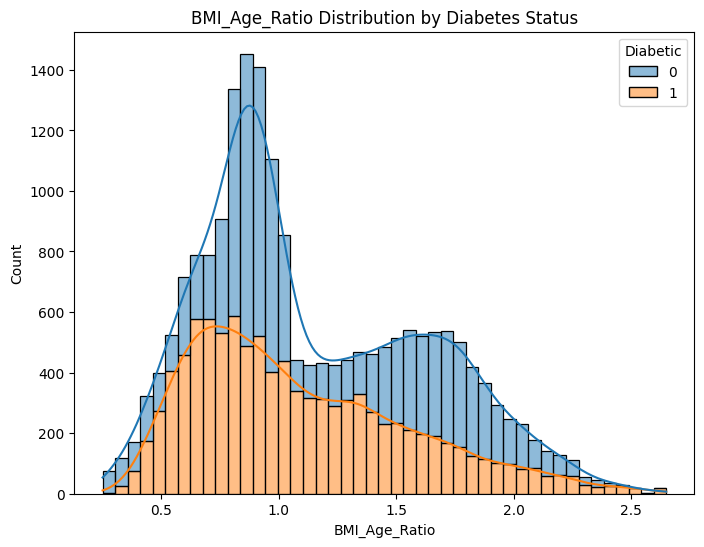

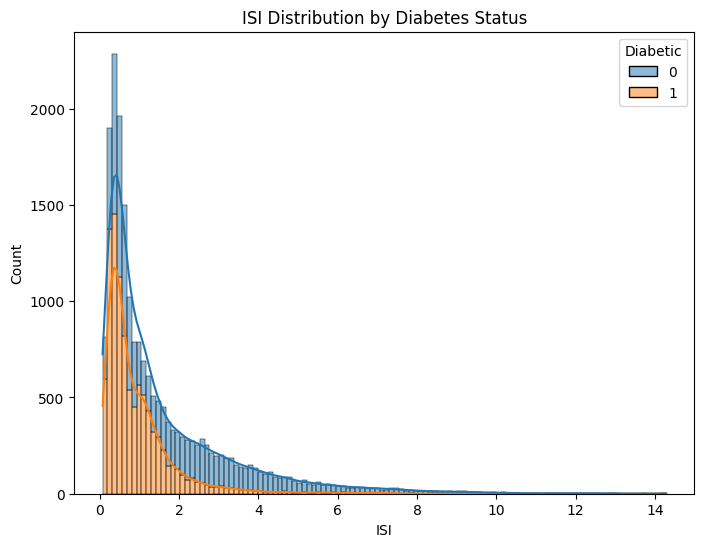

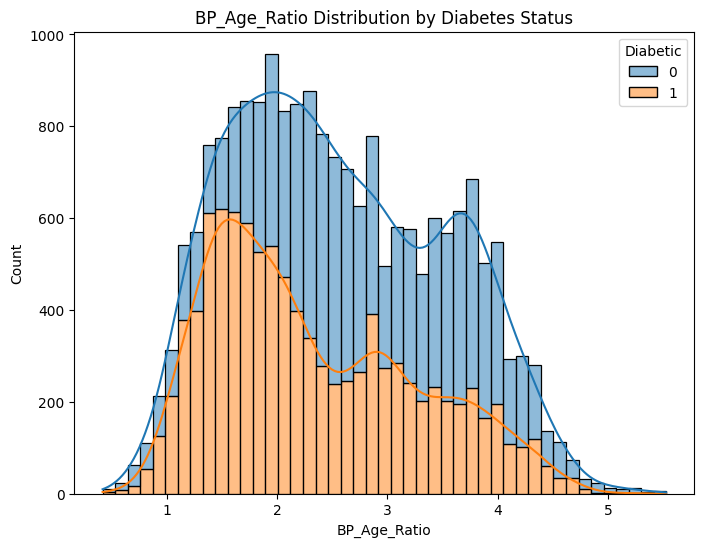

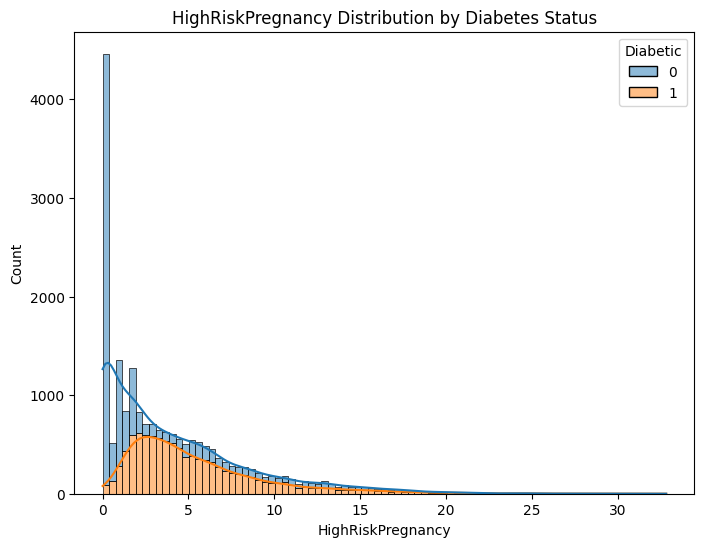

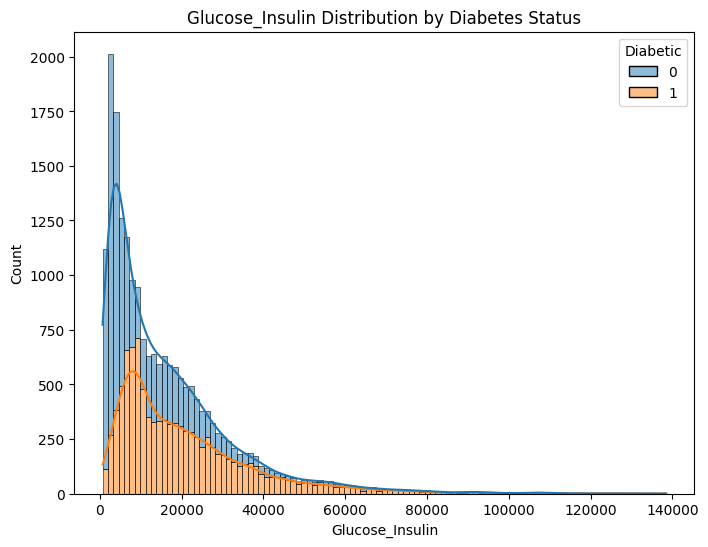

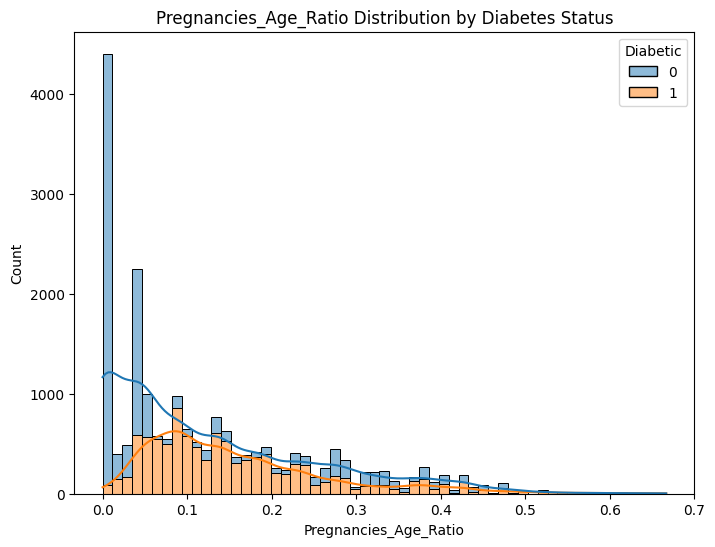

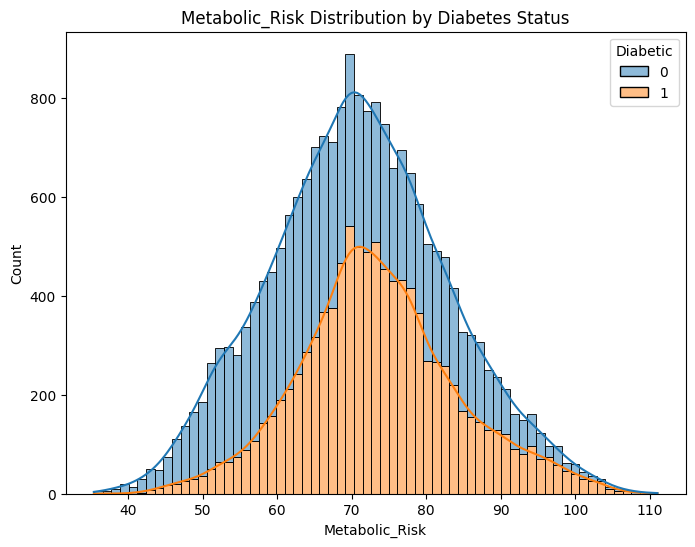

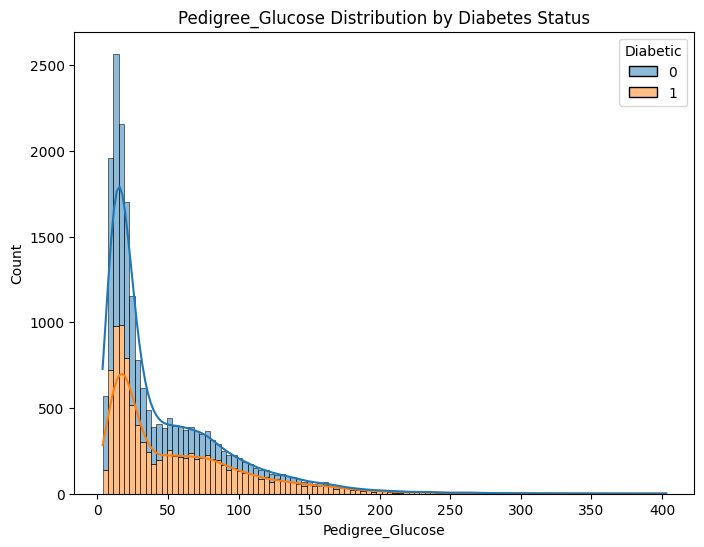

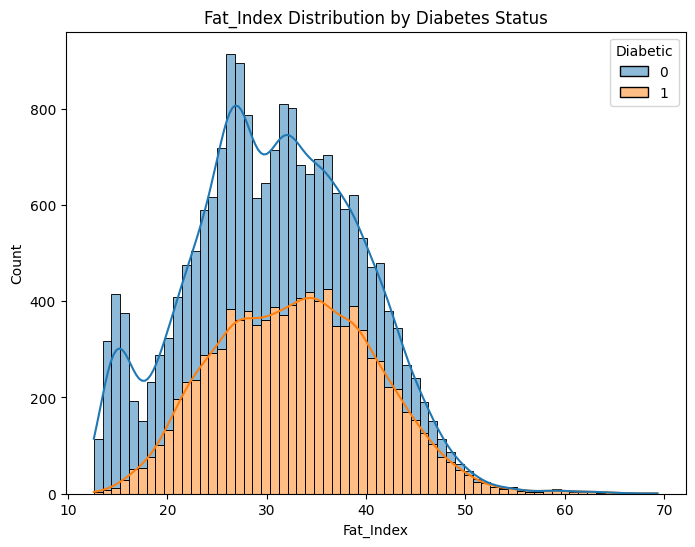

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of continuous features
continuous_features = [
    'Age', 'BMI', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness',
    'SerumInsulin', 'BMI_Age_Ratio', 'ISI', 'BP_Age_Ratio', 'HighRiskPregnancy',
    'Glucose_Insulin', 'Pregnancies_Age_Ratio', 'Metabolic_Risk', 'Pedigree_Glucose', 'Fat_Index'
]

# Plot histograms for continuous features
for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, hue='Diabetic', kde=True, multiple='stack')
    plt.title(f'{feature} Distribution by Diabetes Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


## **Correlation Heatmap**


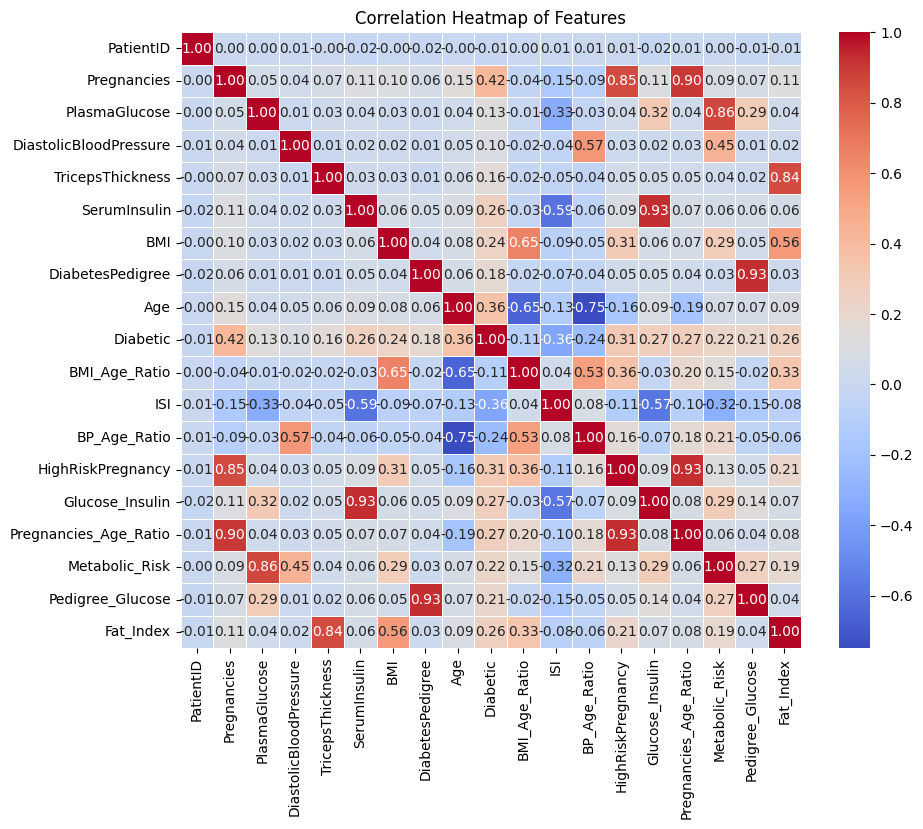

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


**Orginal data correlation matric**

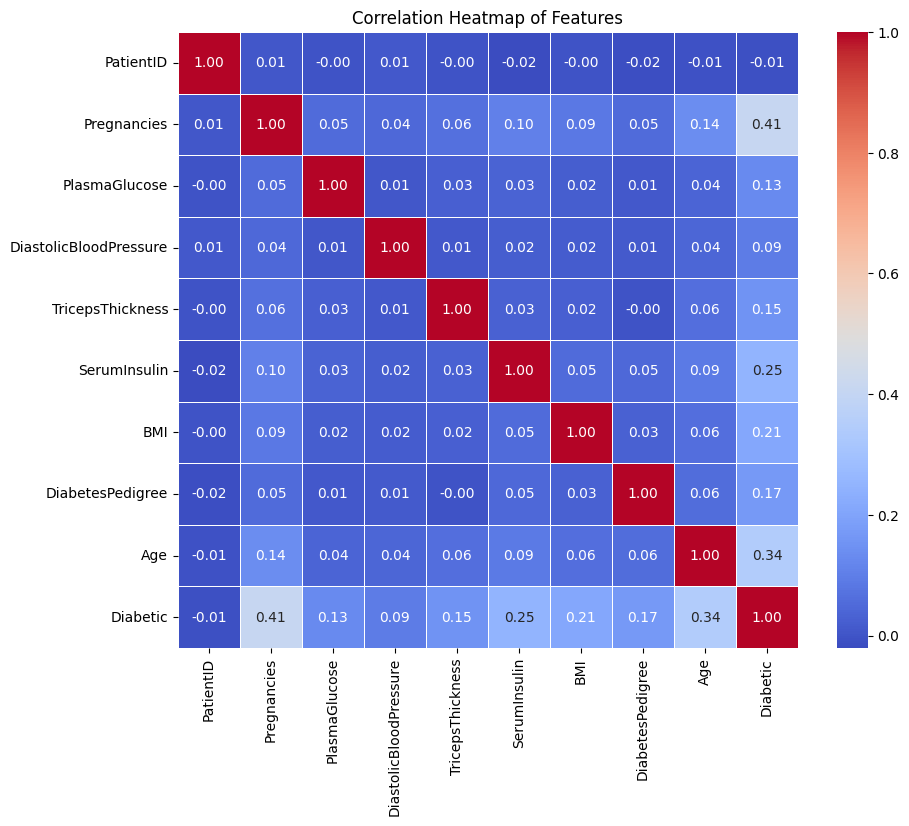

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


# **Random Forest**

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [25]:
X = df.drop(columns=['Diabetic'])
y = df['Diabetic'] # target

# training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Model training**

**using k-fold cross validation**

**cross_val_score:** This function performs cross-validation by splitting the dataset into k folds. In this case, cv=10 specifies 10-fold cross-validation.

**scoring='accuracy':** This sets the metric used for evaluating the model's performance. You can change it to other metrics like precision, recall, or f1 if needed.

**cv_scores.mean():** This will give you the average accuracy across all folds.

**cv_scores.std():** This will provide the standard deviation of the accuracy across all folds, which gives an idea of how stable the model's performance is across different splits.

In [26]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize
rf_model = RandomForestClassifier(n_estimators=100,max_depth=10, random_state=42)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='accuracy')

# Create a DataFrame to display the scores
cv_results = pd.DataFrame(cv_scores, columns=['Fold Accuracy'])

# Calculate the mean and standard deviation of the cross-validation scores
mean_accuracy = cv_scores.mean()
std_accuracy = cv_scores.std()

cv_results.loc['Mean Accuracy'] = mean_accuracy
cv_results.loc['Std Dev Accuracy'] = std_accuracy

print("\nCross-validation Results:")
print(cv_results)

rf_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(rf_model, 'random_forest_model.joblib')
print("Model saved as 'random_forest_model.joblib'")


Cross-validation Results:
                  Fold Accuracy
0                          0.93
1                          0.93
2                          0.93
3                          0.93
4                          0.92
5                          0.93
6                          0.93
7                          0.93
8                          0.92
9                          0.93
Mean Accuracy              0.93
Std Dev Accuracy           0.00
Model saved as 'random_forest_model.joblib'


In [85]:
y_pred = rf_model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'\nTest Accuracy: {accuracy:.4f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Test Accuracy: 0.9337

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2001
           1       0.93      0.94      0.93      1999

    accuracy                           0.93      4000
   macro avg       0.93      0.93      0.93      4000
weighted avg       0.93      0.93      0.93      4000


Confusion Matrix:
[[1863  138]
 [ 127 1872]]


# **Random forest Validation**

Accuracy: 0.9337

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2001
           1       0.93      0.94      0.93      1999

    accuracy                           0.93      4000
   macro avg       0.93      0.93      0.93      4000
weighted avg       0.93      0.93      0.93      4000


Confusion Matrix:
[[1863  138]
 [ 127 1872]]


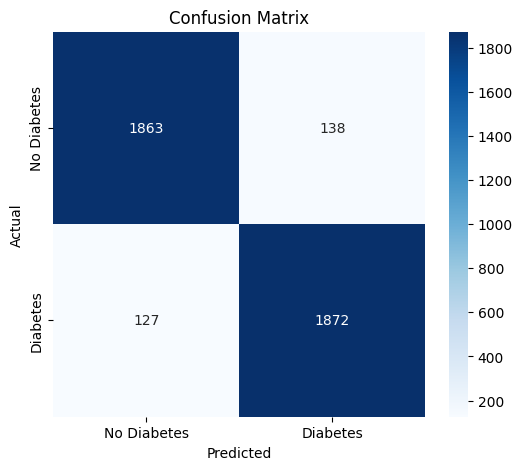

In [86]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print detailed classification report (precision, recall, F1-score, etc.)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Display confusion matrix
print('\nConfusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Optionally, plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Test on generated data**

In [87]:
import numpy as np
import pandas as pd

# Random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
test_data = {
    'Pregnancies': np.random.randint(0, 10, 10),  # Random number of pregnancies
    'PlasmaGlucose': np.random.randint(70, 200, 10),  # Random plasma glucose levels
    'DiastolicBloodPressure': np.random.randint(60, 120, 10),  # Random diastolic blood pressure
    'TricepsThickness': np.random.randint(10, 50, 10),  # Random triceps skinfold thickness
    'SerumInsulin': np.random.randint(0, 900, 10),  # Random serum insulin levels
    'BMI': np.random.uniform(18, 40, 10),  # Random BMI values
    'DiabetesPedigree': np.random.uniform(0, 1, 10),  # Random diabetes pedigree function
    'Age': np.random.randint(21, 60, 10),  # Random age between 21 and 60
    'Diabetic': np.random.choice([0, 1], 10)  # Random diabetic labels (0 = No, 1 = Yes)
}

# Convert the dictionary to a DataFrame
test_df = pd.DataFrame(test_data)

# Optionally, display the generated data
print(test_df)


   Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
0            6            169                     103                12   
1            3            173                      84                46   
2            7            122                     108                16   
3            4             71                      86                30   
4            6            157                     118                18   
5            9            107                     101                48   
6            2            199                      87                27   
7            6             90                     119                13   
8            7            127                      75                34   
9            4             91                      74                23   

   SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  
0           241  28.893892          0.775133   38         1  
1           776  18.756547          0.939499   44 

**Overfitting:** The model shows perfect training accuracy (100%), but it doesn't perform equally well on the test set (92.37%). While the drop in accuracy from 100% to 92% isn't huge, it's an indication that the model might be overfitting to the training data. This is especially visible with the perfect recall and precision on the training set.

**Balanced Precision and Recall:** The model performs fairly well on both classes, with slightly higher recall for non-diabetic individuals (class 0). This means the model does a good job identifying most non-diabetic patients but misses some of the diabetic cases (lower recall for class 1).

**F1-Scores:** The F1-scores of 0.94 and 0.88 indicate that the model performs better for class 0, but overall, the performance is good for both classes. An F1-score closer to 1 for both classes would be ideal, but these results are acceptable.

In [88]:
# Evaluate the model on the training set
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 0.9614
Test Accuracy: 0.9337

Training Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      7999
           1       0.95      0.97      0.96      8001

    accuracy                           0.96     16000
   macro avg       0.96      0.96      0.96     16000
weighted avg       0.96      0.96      0.96     16000


Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2001
           1       0.93      0.94      0.93      1999

    accuracy                           0.93      4000
   macro avg       0.93      0.93      0.93      4000
weighted avg       0.93      0.93      0.93      4000



### **Learning curve**

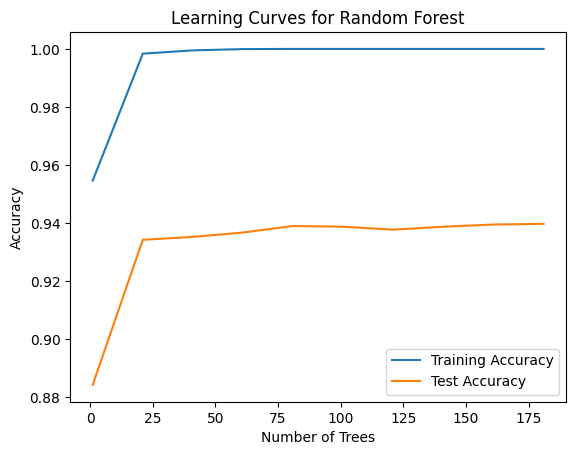

In [89]:
import matplotlib.pyplot as plt

# Plotting training and test accuracy
train_accuracies = []
test_accuracies = []

# Simulating learning curves by retraining and plotting
for i in range(1, 201, 20):
    rf_model = RandomForestClassifier(n_estimators=i, random_state=42)
    rf_model.fit(X_train, y_train)

    train_accuracies.append(accuracy_score(y_train, rf_model.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, rf_model.predict(X_test)))

plt.plot(range(1, 201, 20), train_accuracies, label='Training Accuracy')
plt.plot(range(1, 201, 20), test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Learning Curves for Random Forest')
plt.legend()
plt.show()


### **ROC Curve and AUC (Area Under the Curve)**

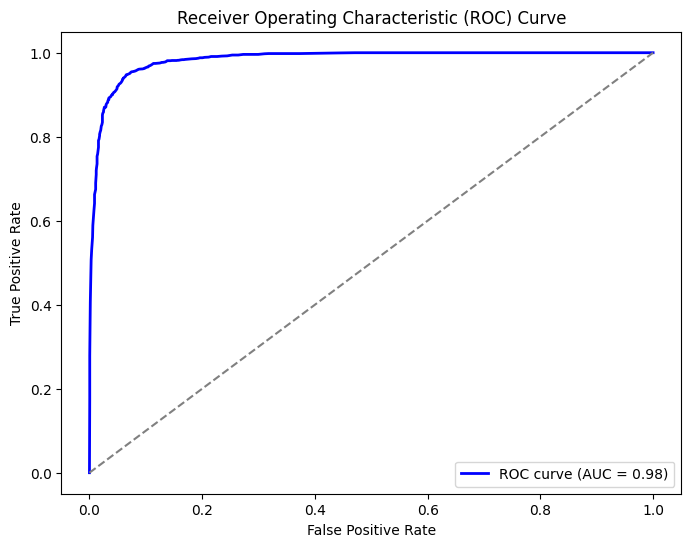

In [90]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


###  **Precision-Recall Curve**

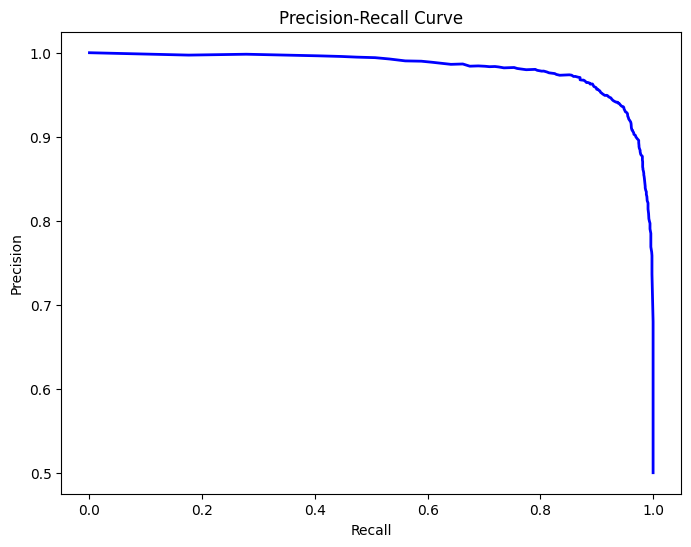

In [91]:
from sklearn.metrics import precision_recall_curve

# Compute precision and recall values
precision, recall, _ = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


# **Logistic Regression**

Accuracy: 0.7705

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77      2001
           1       0.76      0.79      0.77      1999

    accuracy                           0.77      4000
   macro avg       0.77      0.77      0.77      4000
weighted avg       0.77      0.77      0.77      4000


Confusion Matrix:
[[1502  499]
 [ 419 1580]]


c:\Users\PC\miniconda3\envs\ml_project\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


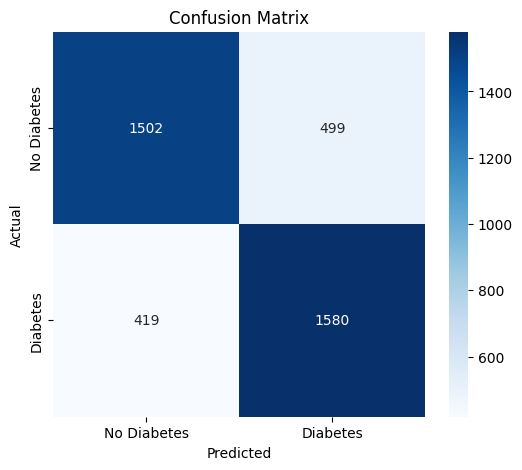

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Split the data into training and testing sets
X = df.drop(columns=['Diabetic'])
y = df['Diabetic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Optionally, plot the confusion matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix in the image represents the performance of  logistic regression model in predicting diabetes based on the dataset described. Here's how to interpret it:

---

### **Confusion Matrix Overview**
| **Predicted/Actual** | **No Diabetes (0)** | **Diabetes (1)** |
|-----------------------|---------------------|------------------|
| **No Diabetes (0)**   | **1502** (True Negatives) | **499** (False Positives) |
| **Diabetes (1)**      | **419** (False Negatives) | **1580** (True Positives) |

---

### **Definitions**:
1. **True Negatives (TN)**: 1502
    - The model correctly predicted "No Diabetes" for patients who don't have diabetes.

2. **False Positives (FP)**: 499
    - The model incorrectly predicted "Diabetes" for patients who don't have diabetes (Type I error).

3. **False Negatives (FN)**: 419
    - The model incorrectly predicted "No Diabetes" for patients who have diabetes (Type II error).

4. **True Positives (TP)**: 1580
    - The model correctly predicted "Diabetes" for patients who have diabetes.

---

### **Key Metrics**
From the confusion matrix, we can calculate the following metrics to evaluate the model's performance:

1. **Accuracy**:
    \[
    \text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{Total Predictions}} = \frac{1502 + 1580}{1502 + 499 + 419 + 1580} = \frac{3082}{4000} = 0.7705 \, (77.05\%)
    \]

2. **Precision (Positive Predictive Value)**:
    \[
    \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} = \frac{1580}{1580 + 499} = 0.7601 \, (76.01\%)
    \]

3. **Recall (Sensitivity)**:
    \[
    \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}} = \frac{1580}{1580 + 419} = 0.7905 \, (79.05\%)
    \]

4. **Specificity**:
    \[
    \text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}} = \frac{1502}{1502 + 499} = 0.7504 \, (75.04\%)
    \]

5. **F1-Score**:
    \[
    \text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \cdot \frac{0.7601 \cdot 0.7905}{0.7601 + 0.7905} = 0.775 \, (77.5\%)
    \]

---

### **Observations**
1. **Strengths**:
    - The model performs moderately well, with an overall accuracy of 77.05%.
    - Recall for detecting diabetes is relatively high (79.05%), indicating the model is good at identifying diabetic patients.

2. **Weaknesses**:
    - The precision is slightly lower (76.01%), which means the model has some false positives—predicting diabetes when the patient doesn't have it.
    - The false negatives (419) indicate missed diagnoses of diabetic patients, which could have serious implications in medical contexts.

---

### **Next Steps**
- **Address False Negatives**: 
    - Consider adjusting the decision threshold to reduce false negatives if minimizing missed diabetes diagnoses is critical.
    - Use techniques like **SMOTE** to balance the classes if the dataset is imbalanced.

- **Feature Analysis**:
    - Investigate feature importance (e.g., `PlasmaGlucose`, `BMI`) to improve model predictions.

- **Model Optimization**:
    - Experiment with more complex models (e.g., Random Forest, XGBoost) or hyperparameter tuning to enhance performance.